In [38]:
import pandas as pd
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# # display all columns of the dataframe
# pd.options.display.max_columns = None

# # display all rows of the dataframe
# pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import  roc_auc_score

# import function to perform feature selection
from sklearn.feature_selection import RFE
import statsmodels
import statsmodels.api as sm
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# import the XGBoost function for classification
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from lightgbm import LGBMClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

In [22]:
df1=pd.read_csv('/content/drive/MyDrive/final.csv') #load data set

In [23]:
df1.isna().sum() #check the null values

df1=df1.drop('Unnamed: 0',1) #removed cloumn with name unnamed

df2=df1.copy() #df2 another data frame copied from df1

In [24]:
#feature engineering made new cloumn by the 4 categories  refrence taken from the health organization cdc

In [25]:
df2.insert(5, "weightstatus",True)

In [26]:
#define function to fill weight cloumn status
def cte(x):
    if (x>=30) :
    return('Obesity')
  elif (x >=25) and (x <=29.9):
    return('Overweight')
  elif (x>=18.5) and (x <= 24.9):
    return("Healthy")
  else:
    return('Underweight')

In [27]:
df2['weightstatus']=df2['BMI'].apply(cte)

In [218]:
# df2['weightstatus'].value_counts()

In [219]:
df2

,PhysicalActivity,HeartDisease,Race,AgeCategory,BMI,AlcoholDrinking,PhysicalHealth,MentalHealth,SleepTime,Stroke,Asthma,SkinCancer,KidneyDisease,Diabetic,DiffWalking,Smoking,Sex,GenHealth
0,Yes,No,White,55 to 59,16.600000,No,3.000000,30.000000,5.000000,No,No,Yes,Yes,Yes,No,Yes,Female,Very Good
1,Yes,No,Black,65 to 69,29.180000,No,0.000000,0.000000,7.000000,No,No,No,Yes,No,No,No,Female,Good
2,Yes,No,White,80 plus,20.340000,No,0.000000,0.000000,7.000000,Yes,Yes,No,Yes,No,No,No,Female,Very Good
3,Yes,No,White,65 to 69,26.580000,No,20.000000,30.000000,8.000000,No,No,No,Yes,Yes,No,Yes,Male,Fair
4,No,No,White,75 to 79,24.210000,No,0.000000,0.000000,6.000000,No,Yes,Yes,Yes,No,No,No,Female,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354238,Yes,No,Hispanic,45 to 49,24.240000,No,0.000000,0.000000,6.000000,No,Yes,No,Yes,No,No,No,Female,Good
354239,No,No,Hispanic,25 to 29,32.810000,No,0.000000,0.000000,12.000000,No,Yes,No,Yes,No,No,No,Female,Good
354240,Yes,No,Hispanic,80 plus,46.560000,No,0.000000,0.000000,8.000000,No,Yes,No,Yes,No,No,No,Female,Good
354241,Yes,No,Hispanic,55 to 59,26.610000,No,0.000000,0.000000,6.000000,No,Yes,No,Yes,No,No,No,Male,Good


In [28]:

df2['HeartDisease'] = df2[['HeartDisease']].replace('Yes',1) #replace yes with 1


df2['HeartDisease'] = df2[['HeartDisease']].replace('No',0) #replaced no with 0



df2.info()

#check the target cloumn data point it is balanced or not
df2.HeartDisease.value_counts() #imblanced data set we apply smote method

df_feature=df2
df_target=df_feature['HeartDisease']
df_feature=df_feature.drop('HeartDisease',1)




df_num = df_feature.select_dtypes(include = [np.number]) #selected only numeric data cloumns
df_num.columns

df_cat = df_feature.select_dtypes(include = [np.object]) #selected only categorical data clomns
df_cat.columns

# use 'get_dummies' from pandas to create dummy variables
# use 'drop_first' to create (n-1) dummy variables
dummy_var = pd.get_dummies(data = df_cat, drop_first = True)



X = pd.concat([df_num, dummy_var], axis = 1)
# display first five observations
X.head()

# add a constant column to the dataframe
# while using the 'Logit' method in the Statsmodels library, the method do not consider the intercept by default
# we can add the intercept to the set of independent variables using 'add_constant()'
#X = sm.add_constant(X)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, df_target, random_state = 20, test_size = 0.29,stratify=df_target)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

df_num.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354243 entries, 0 to 354242
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   PhysicalActivity  354243 non-null  object 
 1   HeartDisease      354243 non-null  int64  
 2   Race              354243 non-null  object 
 3   AgeCategory       354243 non-null  object 
 4   BMI               354243 non-null  float64
 5   weightstatus      354243 non-null  object 
 6   AlcoholDrinking   354243 non-null  object 
 7   PhysicalHealth    354243 non-null  float64
 8   MentalHealth      354243 non-null  float64
 9   SleepTime         354243 non-null  float64
 10  Stroke            354243 non-null  object 
 11  Asthma            354243 non-null  object 
 12  SkinCancer        354243 non-null  object 
 13  KidneyDisease     354243 non-null  object 
 14  Diabetic          354243 non-null  object 
 15  DiffWalking       354243 non-null  object 
 16  Smoking           35

,BMI,PhysicalHealth,MentalHealth,SleepTime
0,16.600000,3.000000,30.000000,5.000000
1,29.180000,0.000000,0.000000,7.000000
2,20.340000,0.000000,0.000000,7.000000
3,26.580000,20.000000,30.000000,8.000000
4,24.210000,0.000000,0.000000,6.000000


In [1]:
# create a generalized function to calculate the metrics values for test set
def get_test_report(model):
  test_pred = model.predict(X_test)
  return(classification_report(y_test, test_pred))
# create a generalized function to calculate the metrics values for train set
def get_train_report(model):
  train_pred = model.predict(X_train)
  return(classification_report(y_train, train_pred))
def plot_confusion_matrix(model):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()
def plot_roc(model):
    y_pred_prob = model.predict_proba(X_test)[:,1]
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    print(roc_auc_score(y_test, y_pred_prob))

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC curve for CHD Prediction Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.82, y = 0.3, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)


    
    
    


In [222]:
#SMOTE application  code run only when need
# print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
# print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
# # import SMOTE module from imblearn library
# # pip install imblearn (if you don't have imblearn in your system)
# from imblearn.over_sampling import SMOTE
# sm1 = SMOTE(random_state = 2,sampling_strategy=0.3)
# X_train, y_train = sm1.fit_resample(X_train, y_train.ravel())
  
# print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
# print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))
  
# print("After OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
# print("After OverSampling, counts of label '0': {}".format(sum(y_train == 0)))


In [223]:
#logestic regression by sciket learn for model comprasion
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression( class_weight='balanced')
lgr.fit(X_train, y_train)



LogisticRegression(class_weight='balanced')

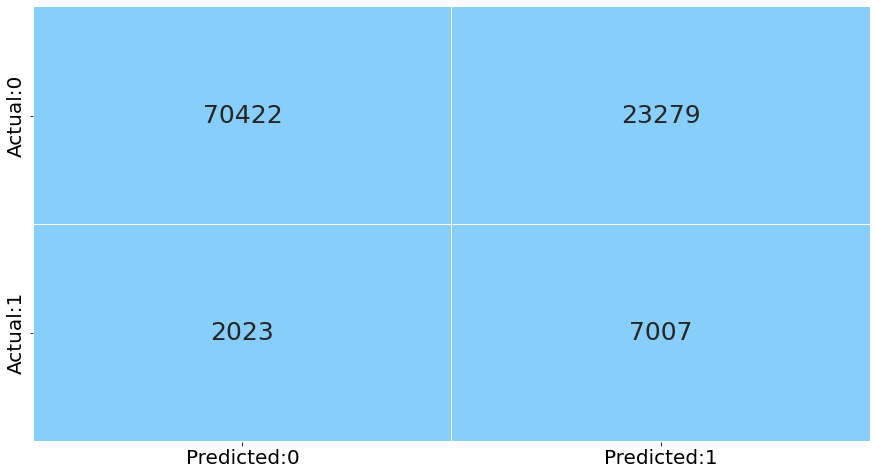

In [224]:
from logging import LoggerAdapter
plot_confusion_matrix(lgr)

In [225]:
#test data classification report
test_report = get_test_report(lgr)
print(test_report)


              precision    recall  f1-score   support

           0       0.97      0.75      0.85     93701
           1       0.23      0.78      0.36      9030

    accuracy                           0.75    102731
   macro avg       0.60      0.76      0.60    102731
weighted avg       0.91      0.75      0.80    102731



In [226]:
# instantiate the 'XGBClassifier'
# set the maximum depth of the tree using the parameter, 'max_depth'
# pass the value of minimum loss reduction required for partition of the leaf node to the parameter, 'gamma'
xgb_model = XGBClassifier(max_depth = 10, gamma =0.5)

# fit the model using fit() on train data
xgb_model.fit(X_train, y_train)

XGBClassifier(gamma=0.5, max_depth=10)

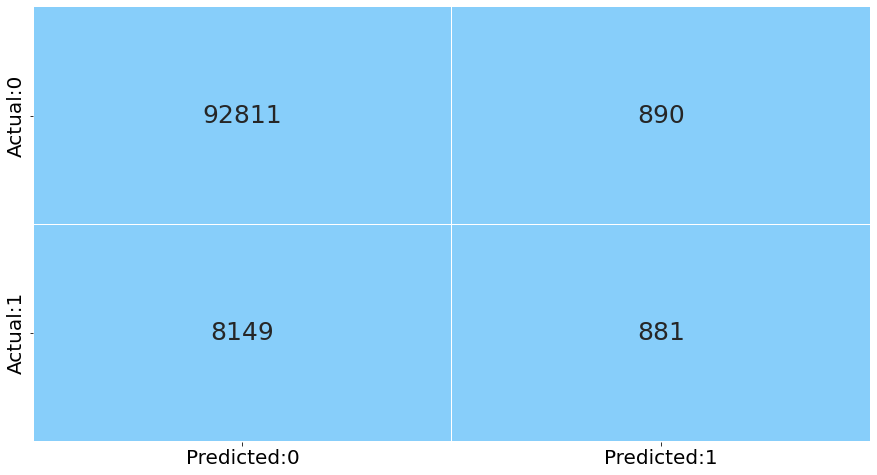

In [227]:
# call the function to plot the confusion matrix
# pass the XGBoost model to the function
plot_confusion_matrix(xgb_model)

In [228]:
test_report = get_test_report(xgb_model)

# print the performance measures
print(test_report)

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     93701
           1       0.50      0.10      0.16      9030

    accuracy                           0.91    102731
   macro avg       0.71      0.54      0.56    102731
weighted avg       0.88      0.91      0.88    102731



In [229]:
# instantiate the 'RandomForestClassifier'
# pass the required number of trees in the random forest to the parameter, 'n_estimators'
# pass the 'random_state' to obtain the same samples for each time you run the code
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10,)

# use fit() to fit the model on the train set
rf_model = rf_classification.fit(X_train, y_train)

In [230]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the random forest model to the function
test_report = get_test_report(rf_model)

# print the performace measures
print(test_report) 

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     93701
           1       0.34      0.12      0.18      9030

    accuracy                           0.90    102731
   macro avg       0.63      0.55      0.56    102731
weighted avg       0.87      0.90      0.88    102731



In [3]:
from sklearn.ensemble import ExtraTreesClassifier

In [4]:

extra_model = ExtraTreesClassifier()
# print the performance measures
#print(test_report)


extra_pred = extra_model.fit(X_train, y_train)
#print(model.feature_importances_)

NameError: name 'X_train' is not defined

In [ ]:
test_report = get_test_report(extra_model)
print(test_report)

In [233]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth = 20, min_samples_leaf = 20)
dtc_pred = dtc.fit(X_train, y_train)


In [234]:
train_report = get_train_report(dtc)
print(train_report)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96    229405
           1       0.62      0.18      0.28     22107

    accuracy                           0.92    251512
   macro avg       0.77      0.59      0.62    251512
weighted avg       0.90      0.92      0.90    251512



In [235]:
NB=GaussianNB()
NB.fit(X_train,y_train)
y_prob=NB.predict_proba(X_test)
y_prob[:10]

array([[9.99874651e-01, 1.25348938e-04],
       [1.00000000e+00, 2.17590997e-12],
       [9.96966504e-01, 3.03349639e-03],
       [1.00000000e+00, 1.21623364e-18],
       [5.61141561e-02, 9.43885844e-01],
       [9.99976793e-01, 2.32069044e-05],
       [9.76645477e-01, 2.33545229e-02],
       [9.99996651e-01, 3.34921908e-06],
       [7.90582493e-01, 2.09417507e-01],
       [6.87348294e-01, 3.12651706e-01]])

In [236]:
y_class=NB.predict(X_test)
y_class[:10]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [237]:
test_report = get_test_report(NB)
print(test_report)

              precision    recall  f1-score   support

           0       0.97      0.75      0.84     93701
           1       0.22      0.73      0.34      9030

    accuracy                           0.75    102731
   macro avg       0.59      0.74      0.59    102731
weighted avg       0.90      0.75      0.80    102731



In [238]:
# # instantiate the 'AdaBoostClassifier'
# # n_estimators: number of estimators at which boosting is terminated
# # pass the 'random_state' to obtain the same results for each code implementation
ada_model = AdaBoostClassifier(n_estimators = 60, random_state = 10)

#fit the model using fit() on train data
ada_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=60, random_state=10)

In [239]:
test_report = get_test_report(ada_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     93701
           1       0.51      0.12      0.19      9030

    accuracy                           0.91    102731
   macro avg       0.71      0.55      0.57    102731
weighted avg       0.88      0.91      0.89    102731



In [240]:
# consider the various algorithms as base learners
base_learners = [('rf_model', RandomForestClassifier(criterion = 'entropy', max_depth = 12, max_features = 'sqrt', 
                                                     max_leaf_nodes = 8, min_samples_leaf = 5, min_samples_split = 2, 
                                                     n_estimators = 50, random_state = 10)),
                 ('ada_model_dt', AdaBoostClassifier(n_estimators = 60, random_state = 10)),
                 ('NB_model', GaussianNB())]

# initialize stacking classifier 
# pass the base learners to the parameter, 'estimators'
# pass the Naive Bayes model as the 'final_estimator'/ meta model
stack_model = StackingClassifier(estimators = base_learners, final_estimator = AdaBoostClassifier())

# fit the model on train dataset
stack_model.fit(X_train, y_train)

StackingClassifier(estimators=[('rf_model',
                                RandomForestClassifier(criterion='entropy',
                                                       max_depth=12,
                                                       max_features='sqrt',
                                                       max_leaf_nodes=8,
                                                       min_samples_leaf=5,
                                                       n_estimators=50,
                                                       random_state=10)),
                               ('ada_model_dt',
                                AdaBoostClassifier(n_estimators=60,
                                                   random_state=10)),
                               ('NB_model', GaussianNB())],
                   final_estimator=AdaBoostClassifier())

In [241]:
test_report = get_test_report(stack_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     93701
           1       0.52      0.10      0.16      9030

    accuracy                           0.91    102731
   macro avg       0.72      0.54      0.56    102731
weighted avg       0.88      0.91      0.88    102731



In [242]:
# bagging classifier
bg_model = BaggingClassifier(
                          n_estimators =150,
                          random_state = 10).fit(X_train,y_train)

  


In [243]:
test_report = get_test_report(bg_model) #model predection on test data
print(test_report)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     93701
           1       0.36      0.14      0.20      9030

    accuracy                           0.90    102731
   macro avg       0.64      0.56      0.57    102731
weighted avg       0.87      0.90      0.88    102731



In [244]:
plot_roc(bg_model)

0.7820513662819212


In [245]:
#boosting the base models 

In [246]:
# hyper parameter tuning by grid search by descision tree

In [247]:
# # create a dictionary with hyperparameters and its values
# # pass the criteria 'entropy' and 'gini' to the parameter, 'criterion' 
# # pass the range of values to 'max_depth' that assigns maximum depth of the tree
# # 'max_features' assigns maximum number of features to consider for the best split. We pass the string 'sqrt' and 'log2'
# # 'sqrt' considers maximum number of features equal to the square root of total features
# # 'log2' considers maximum number of features equal to the log of total features with base 2
# # pass the range of values to 'min_samples_split' that assigns minimum number of samples to split an internal node
# # pass the range of values to 'min_samples_leaf' that assigns minimum number of samples required at the terminal/leaf node
# # pass the range of values to 'max_leaf_nodes' that assigns maximum number of leaf nodes in the tree
# tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
#                      'max_depth': range(8, 15),
#                      'max_features': ["sqrt", "log2"],
#                      'min_samples_split': range(5,10),
#                      'min_samples_leaf': range(5,10),
#                      'max_leaf_nodes': range(5, 10)}]
 
# # instantiate the 'DecisionTreeClassifier' 
# # pass the 'random_state' to obtain the same samples for each time you run the code
# decision_tree_classification = DecisionTreeClassifier(random_state = 10)

# # use GridSearchCV() to find the optimal value of the hyperparameters
# # estimator: pass the decision tree classifier model
# # param_grid: pass the list 'tuned_parameters'
# # cv: number of folds in k-fold i.e. here cv = 5
# tree_grid = GridSearchCV(estimator = decision_tree_classification, 
#                          param_grid = tuned_paramaters, 
#                          cv = 4)

# # fit the model on X_train and y_train using fit()
# tree_grid_model = tree_grid.fit(X_train, y_train)

# # get the best parameters
# print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

In [248]:
#got parameters Best parameters for decision tree classifier:  {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'max_leaf_nodes': 5, 'min_samples_leaf': 5, 'min_samples_split': 5} 

In [249]:
# instantiate the 'DecisionTreeClassifier'
# 'best_params_' returns the dictionary containing best parameter values and parameter name  
# 'get()' returns the value of specified parameter
# pass the 'random_state' to obtain the same samples for each time you run the code
# dt_model = DecisionTreeClassifier(criterion = tree_grid_model.best_params_.get('criterion'),
#                                   max_depth = tree_grid_model.best_params_.get('max_depth'),
#                                   max_features = tree_grid_model.best_params_.get('max_features'),
#                                   max_leaf_nodes = tree_grid_model.best_params_.get('max_leaf_nodes'),
#                                   min_samples_leaf = tree_grid_model.best_params_.get('min_samples_leaf'),
#                                   min_samples_split = tree_grid_model.best_params_.get('min_samples_split'),
#                                   random_state = 10)
dt_model = DecisionTreeClassifier(criterion ='entropy',
                                  max_depth =8,
                                  max_features ='sqrt',
                                  max_leaf_nodes =5 ,
                                  min_samples_leaf = 5,
                                  min_samples_split = 5,
                                  random_state = 10)

# use fit() to fit the model on the train set
dt_model = dt_model.fit(X_train, y_train)

In [250]:
#Random forest hyper parameter tuning with Grid search

In [251]:
# # create a dictionary with hyperparameters and its values
# # pass the criteria 'entropy' and 'gini' to the parameter, 'criterion' 
# # pass a list of values to 'n_estimators' to build the different number of trees in the random forest
# # pass a list of values to 'max_depth' that assigns maximum depth of the tree
# # 'max_features' assigns maximum number of features to consider for the best split. We pass the string 'sqrt' and 'log2'
# # 'sqrt' considers maximum number of features equal to the square root of total features
# # 'log2' considers maximum number of features equal to the log of total features with base 2
# # pass a list of values to 'min_samples_split' that assigns minimum number of samples to split an internal node
# # pass a list of values to 'min_samples_leaf' that assigns minimum number of samples required at the terminal/leaf node
# # pass a list of values to 'max_leaf_nodes' that assigns maximum number of leaf nodes in the tree
# tuned_paramaters = [{'criterion': ['entropy', 'gini'],
#                      'n_estimators': [ 30, 50, 70, 90],
#                      'max_depth': [10, 15, 20],
#                      'max_features': ['sqrt', 'log2'],
#                      'min_samples_split': [2, 5, 8, 11],
#                      'min_samples_leaf': [1, 5, 9],
#                      'max_leaf_nodes': [8, 11]}]
 
# # instantiate the 'RandomForestClassifier' 
# # pass the 'random_state' to obtain the same samples for each time you run the code
# random_forest_classification = RandomForestClassifier(random_state = 10)

# # use GridSearchCV() to find the optimal value of the hyperparameters
# # estimator: pass the random forest classifier model
# # param_grid: pass the list 'tuned_parameters'
# # cv: number of folds in k-fold i.e. here cv = 5
# rf_grid = GridSearchCV(estimator = random_forest_classification, 
#                        param_grid = tuned_paramaters, 
#                        cv =4,scoring='roc_auc')

# # use fit() to fit the model on the train set
# rf_grid_model = rf_grid.fit(X_train, y_train)

# # get the best parameters
# print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

In [252]:
#Best parameters for random forest classifier:  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': 11, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 90} 


In [253]:
# instantiate the 'RandomForestClassifier'
# 'best_params_' returns the dictionary containing best parameter values and parameter name  
# 'get()' returns the value of specified parameter
# pass the 'random_state' to obtain the same samples for each time you run the code
# rf_model = RandomForestClassifier(criterion = rf_grid_model.best_params_.get('criterion'), 
#                                   n_estimators = rf_grid_model.best_params_.get('n_estimators'),
#                                   max_depth = rf_grid_model.best_params_.get('max_depth'),
#                                   max_features = rf_grid_model.best_params_.get('max_features'),
#                                   max_leaf_nodes = rf_grid_model.best_params_.get('max_leaf_nodes'),
#                                   min_samples_leaf = rf_grid_model.best_params_.get('min_samples_leaf'),
#                                   min_samples_split = rf_grid_model.best_params_.get('min_samples_split'),
#                                   random_state = 10)
rf_model = RandomForestClassifier(criterion ='entropy', 
                                  n_estimators = 90,
                                  max_depth = 10,
                                  max_features ='log2',
                                  max_leaf_nodes =11 ,
                                  min_samples_leaf =1,
                                  min_samples_split = 2,
                                  random_state = 10)

# use fit() to fit the model on the train set
rf_grid_model = rf_model.fit(X_train, y_train)

# print the performance measures for test set for the model with best parameters
print('Classification Report for test set:\n', get_test_report(rf_model))

Classification Report for test set:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     93701
           1       0.00      0.00      0.00      9030

    accuracy                           0.91    102731
   macro avg       0.46      0.50      0.48    102731
weighted avg       0.83      0.91      0.87    102731



In [254]:
#boosting base models descision tree

In [255]:
dt_model = DecisionTreeClassifier(criterion = 'entropy',
                                   max_depth = 8,
                                   max_features = 'sqrt',
                                   max_leaf_nodes = 5,
                                   min_samples_leaf = 5,
                                   min_samples_split = 5,
                                   random_state = 5)
dt_model = dt_model.fit(X_train, y_train)

In [256]:
# # instantiate the 'AdaBoostClassifier'
# # n_estimators: number of estimators at which boosting is terminated
# # pass the 'random_state' to obtain the same results for each code implementation
ada_model_dt = AdaBoostClassifier(base_estimator= dtc,n_estimators = 60, random_state = 10)

#fit the model using fit() on train data
ada_model_dt.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=20,
                                                         min_samples_leaf=20),
                   n_estimators=60, random_state=10)

In [257]:
print('Classification Report for test set: \n', get_test_report(dt_model))

Classification Report for test set: 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     93701
           1       0.00      0.00      0.00      9030

    accuracy                           0.91    102731
   macro avg       0.46      0.50      0.48    102731
weighted avg       0.83      0.91      0.87    102731



In [258]:
#boosting base model random forest

In [259]:
# # instantiate the 'AdaBoostClassifier'
# # n_estimators: number of estimators at which boosting is terminated
# # pass the 'random_state' to obtain the same results for each code implementation
ada_model_rf = AdaBoostClassifier(base_estimator= rf_model,n_estimators = 60, random_state = 10)

#fit the model using fit() on train data
ada_model_rf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(criterion='entropy',
                                                         max_depth=10,
                                                         max_features='log2',
                                                         max_leaf_nodes=11,
                                                         n_estimators=90,
                                                         random_state=10),
                   n_estimators=60, random_state=10)

In [260]:
#stacking models with randomforest+adabost+descision tree

In [261]:
# consider the various algorithms as base learners
base_learners = [('rf_model', RandomForestClassifier(criterion = 'entropy', max_depth = 10, max_features = 'sqrt', 
                                                     max_leaf_nodes = 8, min_samples_leaf = 5, min_samples_split = 2, 
                                                     n_estimators = 50, random_state = 10)),
                 ('ada_model_dt', AdaBoostClassifier(n_estimators = 60, random_state = 10)),
                 ('DT_model',DecisionTreeClassifier(criterion = 'entropy',
                                   max_depth = 8,
                                   max_features = 'sqrt',
                                   max_leaf_nodes = 5,
                                   min_samples_leaf = 5,
                                   min_samples_split = 5,
                                   random_state = 5))]

# initialize stacking classifier 
# pass the base learners to the parameter, 'estimators'
# pass the Naive Bayes model as the 'final_estimator'/ meta model
stack_model_ada_dt_rf = StackingClassifier(estimators = base_learners, final_estimator = AdaBoostClassifier())

# fit the model on train dataset
stack_model_ada_dt_rf.fit(X_train, y_train)

StackingClassifier(estimators=[('rf_model',
                                RandomForestClassifier(criterion='entropy',
                                                       max_depth=10,
                                                       max_features='sqrt',
                                                       max_leaf_nodes=8,
                                                       min_samples_leaf=5,
                                                       n_estimators=50,
                                                       random_state=10)),
                               ('ada_model_dt',
                                AdaBoostClassifier(n_estimators=60,
                                                   random_state=10)),
                               ('DT_model',
                                DecisionTreeClassifier(criterion='entropy',
                                                       max_depth=8,
                                                       max_features

In [262]:
#applying light GBM classification 

In [263]:
import lightgbm as lgb

light=lgb.LGBMClassifier(lambda_l1=1.5,lambda_l2=1,min_data_in_leaf=30,num_leaves=30,reg_alpha=0.1)

In [264]:
light_gbm=light.fit(X_train,y_train)

In [265]:
#applying xg boost with descision tree

In [266]:
# instantiate the 'XGBClassifier'
# set the maximum depth of the tree using the parameter, 'max_depth'
# pass the value of minimum loss reduction required for partition of the leaf node to the parameter, 'gamma'
xgb_model_dt = XGBClassifier(base_estimator=dt_model,max_depth = 10, gamma =0.5)

# fit the model using fit() on train data
xgb_model_dt.fit(X_train, y_train)

XGBClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=8,
                                                    max_features='sqrt',
                                                    max_leaf_nodes=5,
                                                    min_samples_leaf=5,
                                                    min_samples_split=5,
                                                    random_state=5),
              gamma=0.5, max_depth=10)

In [80]:
from sklearn.metrics import  roc_auc_score,precision_score,f1_score,recall_score

In [268]:
stack_model.fit(X_train, y_train)
model_all=[lgr,xgb_model,rf_model,extra_pred,dtc_pred,NB,ada_model,stack_model,dt_model,rf_grid_model,ada_model_dt,ada_model_rf,stack_model_ada_dt_rf,light_gbm,xgb_model_dt]
model_scores = { "Model Name" : [],
                "Accuracy score train" : [],
               "Precision_score train" : [],
               "Recall_Score train" : [],
               "Roc_AUC_Score train" : [],
                "F1-Score Train" : [],
               "Accuracy score test" : [],
               "Precision_score test" : [],
               "Recall_Score test" : [],
               "Roc_AUC_Score test" : [],
               "F1-Score test" : []}

for model in model_all:
    
    model_scores['Model Name'].append(str(model))
    pred_tr = model.predict(X_train)
    model_scores['Accuracy score train'].append(model.score(X_train,y_train))
     
    model_scores['Precision_score train'].append(precision_score(y_train,pred_tr))
    model_scores['Recall_Score train'].append(recall_score(y_train,pred_tr))
    model_scores['Roc_AUC_Score train'].append(roc_auc_score(y_train,pred_tr))
    model_scores['F1-Score Train'].append(f1_score(y_train,pred_tr))
    
    pred_ts = model.predict(X_test) 
    model_scores['Accuracy score test'].append(model.score(X_test,y_test))
     
    model_scores['Precision_score test'].append(precision_score(y_test,pred_ts))
    model_scores['Recall_Score test'].append(recall_score(y_test,pred_ts))
    model_scores['Roc_AUC_Score test'].append(roc_auc_score(y_test,pred_ts))
    model_scores['F1-Score test'].append(f1_score(y_test,pred_ts))

scores_df=pd.DataFrame(model_scores)

In [269]:
scores_df.to_excel('final_originaldata_score.xlsx') #to export collected data into excel formate


# K-Fold crossvalidation

In [274]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [270]:
models = []
models.append(('Logistic', lgr))
models.append(('NaiveBayes', NB))
models.append(('KNN',xgb_model))
models.append(('DecisionTree',rf_model))
models.append(('RandomForest',extra_pred))
models.append(('BoostedDT',dtc_pred))
models.append(('BoostedLR',ada_model))
models.append(('BoostedNB',stack_model))
models.append(('GBoost',dt_model))
models.append(('VotingC',rf_grid_model))
models.append(('StackingC',ada_model_rf))
models.append(('XGBoost',ada_model_dt))
models.append(('StackingC',stack_model_ada_dt_rf))
models.append(('XGBoost',light_gbm))
models.append(('StackingC',xgb_model_dt))


Logistic: 0.802770 (0.001775)
NaiveBayes: 0.795215 (0.001828)
KNN: 0.884416 (0.001467)
DecisionTree: 0.870174 (0.001108)
RandomForest: 0.878232 (0.001417)
BoostedDT: 0.884181 (0.001725)
BoostedLR: 0.887780 (0.001455)
BoostedNB: 0.882169 (0.002694)
GBoost: 0.870174 (0.001108)
VotingC: 0.870174 (0.001108)
StackingC: 0.883078 (0.001070)
XGBoost: 0.875597 (0.000818)
StackingC: 0.882147 (0.002693)
XGBoost: 0.883192 (0.000890)
StackingC: 0.884416 (0.001467)


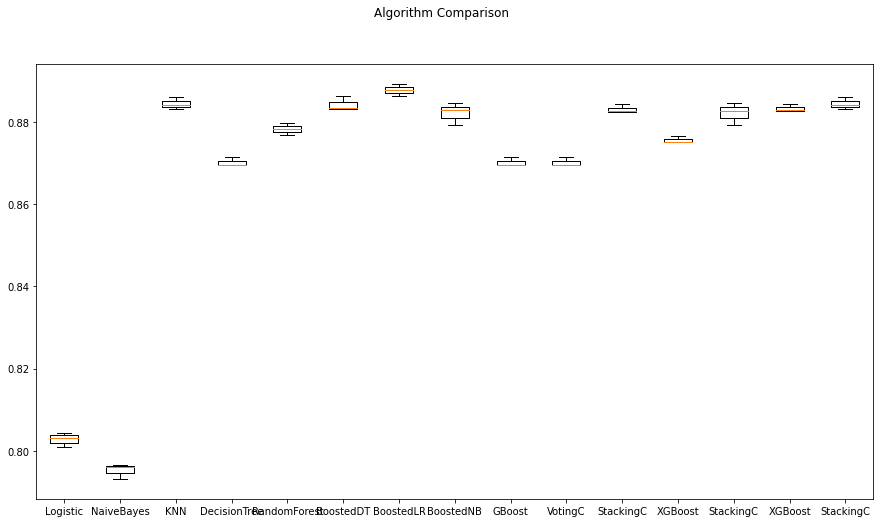

In [276]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = KFold(shuffle=True,n_splits=3,random_state=0)
	cv_results = cross_val_score(model,X,df_target,cv=kfold, scoring='f1_weighted')
	results.append(cv_results)
	names.append(name)
	print("%s: %f (%f)" % (name, np.mean(cv_results),np.std(cv_results,ddof=1)))
#print(results)
   # boxplot algorithm comparison
plt.rcParams['figure.figsize'] = [15,8]
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results).savefig("figure.png")
ax.set_xticklabels(names)
plt.show()

In [278]:
# Logistic: 0.802770 (0.001775)
# NaiveBayes: 0.795215 (0.001828)
# KNN: 0.884416 (0.001467)
# DecisionTree: 0.870174 (0.001108)
# RandomForest: 0.878232 (0.001417)
# BoostedDT: 0.884181 (0.001725)
# BoostedLR: 0.887780 (0.001455)
# BoostedNB: 0.882169 (0.002694)
# GBoost: 0.870174 (0.001108)
# VotingC: 0.870174 (0.001108)
# StackingC: 0.883078 (0.001070)
# XGBoost: 0.875597 (0.000818)
# StackingC: 0.882147 (0.002693)
# XGBoost: 0.883192 (0.000890)
# StackingC: 0.884416 (0.001467)

In [ ]:
#building model stats model for checking feture coefficients 

In [280]:
X1=X.copy() #made new dataframe copy 
X1 = sm.add_constant(X1) #add constant cloumn  if we use stats model

In [297]:
# create an empty dataframe to store the scores for various algorithms
score_card = pd.DataFrame(columns=['Probability Cutoff', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'Kappa Score', 'f1-score'])

# append the result table for all performance scores
# performance measures considered for model comparision are 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score',
# 'Kappa Score', and 'f1-score'
# compile the required information in a user defined function 
def update_score_card(model, cutoff):
    
    # let 'y_pred_prob' be the predicted values of y
    y_pred_prob = logreg.predict(X_test)

    # convert probabilities to 0 and 1 using 'if_else'
    y_pred = [ 0 if x < cutoff else 1 for x in y_pred_prob]
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Probability Cutoff': cutoff,
                                    'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                                     'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)

In [313]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_trainlr,X_testlr, y_trainlr, y_testlr = train_test_split(X1, df_target, random_state = 10, test_size = 0.35,stratify=df_target)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_trainlr.shape)
print('y_train', y_trainlr.shape)

# print dimension of test set
print('X_test', X_testlr.shape)
print('y_test', y_testlr.shape)

X_train (230257, 39)
y_train (230257,)
X_test (123986, 39)
y_test (123986,)


In [307]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model

logreg = sm.Logit(y_trainlr,X_trainlr).fit()


# print the summary of the model
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.232029
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:           HeartDisease   No. Observations:               230257
Model:                          Logit   Df Residuals:                   230218
Method:                           MLE   Df Model:                           38
Date:                Thu, 14 Jul 2022   Pseudo R-squ.:                  0.2205
Time:                        13:49:29   Log-Likelihood:                -53426.
converged:                       True   LL-Null:                       -68535.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -5.1772      0.183    -28.332      0.000      -5.535      -4.819

In [292]:
# 'aic' retuns the AIC value for the model
print('AIC:', logreg.aic)

AIC: 106930.77397725444


In [293]:
y_predict_train=logreg.predict(X_trainlr)#predict the train data with log model


# convert probabilities to 0 and 1 using 'if_else'
y_pred = [ 0 if x < 0.5 else 1 for x in y_predict_train]

In [294]:
y_predict_test=logreg.predict(X_testlr)#predict the train data with log model


# convert probabilities to 0 and 1 using 'if_else'
y_pred_test = [ 0 if x < 0.5 else 1 for x in y_predict_test]

In [298]:
# consider a list of values for cut-off
cutoff = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# use the for loop to compute performance measures for each value of the cut-off
# call the update_score_card() to update the score card for each cut-off
# pass the model and cut-off value to the function
for value in cutoff:
    update_score_card(logreg, value)
update_score_card

<function __main__.update_score_card>

In [299]:
# print the score card 
print('Score Card for Logistic regression:')

# sort the dataframe based on the probability cut-off values ascending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
score_card = score_card.sort_values('Probability Cutoff').reset_index(drop = True)

# color the cell in the columns 'AUC Score', 'Accuracy Score', 'Kappa Score', 'f1-score' having maximum values
# 'style.highlight_max' assigns color to the maximum value
# pass specified color to the parameter, 'color'
# pass the data to limit the color assignment to the parameter, 'subset' 
score_card.style.highlight_max(color = 'lightblue', subset = ['AUC Score', 'Accuracy Score', 'Kappa Score', 'f1-score'])

Score Card for Logistic regression:


,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,0.100000,0.761198,0.240632,0.750688,0.769861,0.266843,0.364442
1,0.200000,0.696938,0.341339,0.483850,0.872566,0.331368,0.400288
2,0.300000,0.628783,0.416047,0.297853,0.901537,0.295494,0.347166
3,0.400000,0.582402,0.481499,0.183887,0.910861,0.228662,0.266135
4,0.500000,0.547730,0.526583,0.104515,0.913031,0.149656,0.174412
5,0.600000,0.525162,0.583168,0.054047,0.913458,0.085286,0.098925
6,0.700000,0.511148,0.654731,0.023491,0.913079,0.039506,0.045354
7,0.800000,0.503608,0.851064,0.007341,0.912635,0.013072,0.014556
8,0.900000,0.500271,0.857143,0.000551,0.912143,0.000988,0.001100


In [71]:
#weights = {0:0.5, 1:11.0}
#weights={0:0.4, 1:10.0} #good score for class weightage

dt_wt = DecisionTreeClassifier(class_weight=weights,criterion = 'entropy',
                                   max_depth = 8,
                                   max_features = 'sqrt',
                                   max_leaf_nodes = 5,
                                   min_samples_leaf = 5,
                                   min_samples_split = 5,
                                   random_state = 10)
dt_wt=dt_wt.fit(X_train,y_train)

In [52]:
test_report = get_test_report(dt_wt) #model predection on test data
print(test_report)

              precision    recall  f1-score   support

           0       0.99      0.06      0.11     93701
           1       0.09      1.00      0.17      9030

    accuracy                           0.14    102731
   macro avg       0.54      0.53      0.14    102731
weighted avg       0.91      0.14      0.11    102731



In [67]:
# # instantiate the 'AdaBoostClassifier'
# # n_estimators: number of estimators at which boosting is terminated
# # pass the 'random_state' to obtain the same results for each code implementation
ada_model_dt_wt = AdaBoostClassifier(base_estimator= dt_wt,n_estimators = 60, random_state = 10)

#fit the model using fit() on train data
ada_model_dt_wt.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.4,
                                                                       1: 10.0},
                                                         criterion='entropy',
                                                         max_depth=8,
                                                         max_features='sqrt',
                                                         max_leaf_nodes=5,
                                                         min_samples_leaf=5,
                                                         min_samples_split=5,
                                                         random_state=10),
                   n_estimators=60, random_state=10)

In [68]:
test_report = get_test_report(ada_model_dt_wt) #model predection on test data
print(test_report)

              precision    recall  f1-score   support

           0       0.98      0.55      0.71     93701
           1       0.16      0.91      0.28      9030

    accuracy                           0.58    102731
   macro avg       0.57      0.73      0.49    102731
weighted avg       0.91      0.58      0.67    102731



In [355]:
grad_model_dt_wt = GradientBoostingClassifier(n_estimators = 60, random_state = 10)
grad_model_dt_wt=grad_model_dt_wt.fit(X_train,y_train)


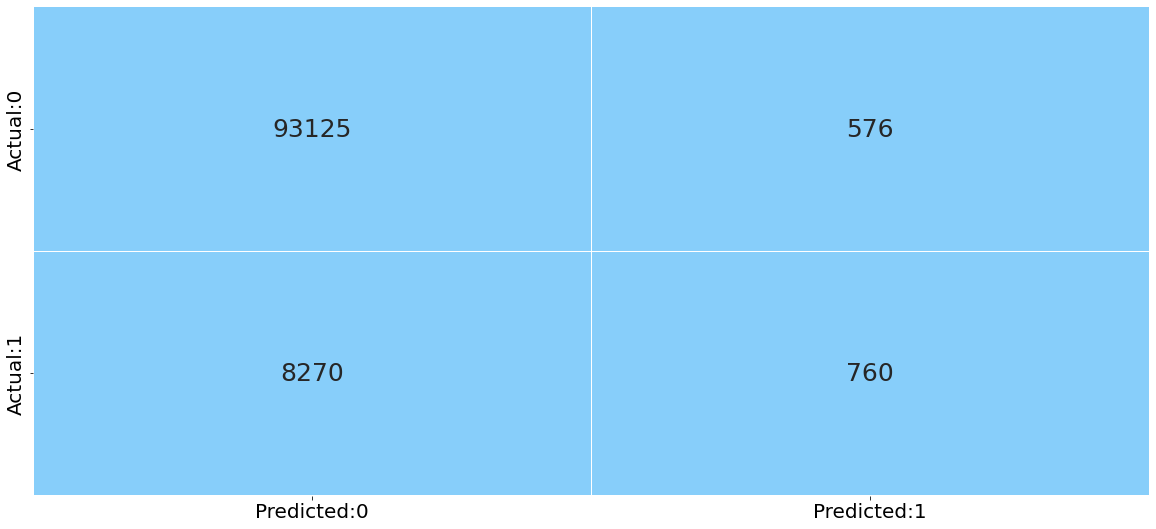

In [356]:
# call the function to plot the confusion matrix

plot_confusion_matrix(grad_model_dt_wt)

In [331]:
test_report = get_test_report(ada_model_dt_wt) #model predection on test data
print(test_report)

              precision    recall  f1-score   support

           0       0.98      0.57      0.73     93701
           1       0.17      0.90      0.29      9030

    accuracy                           0.60    102731
   macro avg       0.58      0.74      0.51    102731
weighted avg       0.91      0.60      0.69    102731



In [334]:
# define grid for get best class weight
balance = [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0.2:1,1:90},{0:1,1:10},{0:1,1:10},{0:1,1:10},{0:1,1:10}, {0:0.5, 1:11.0}, {0:0.5, 1:13.0}]
param_grid = dict(class_weight=balance)

In [342]:
# define evaluation procedure
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=dt_wt, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='recall')

# use fit() to fit the model on the train set
dt_grid_wt = grid.fit(X_train, y_train)

# # get the best parameters
print('Best parameters for random forest classifier: ', dt_grid_wt.best_params_, '\n')

Best parameters for random forest classifier:  {'class_weight': {0: 0.5, 1: 13.0}} 



In [9]:
#logestic regression by sciket learn
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression( class_weight='balanced')
lgr.fit(X_train, y_train)



LogisticRegression(class_weight='balanced')

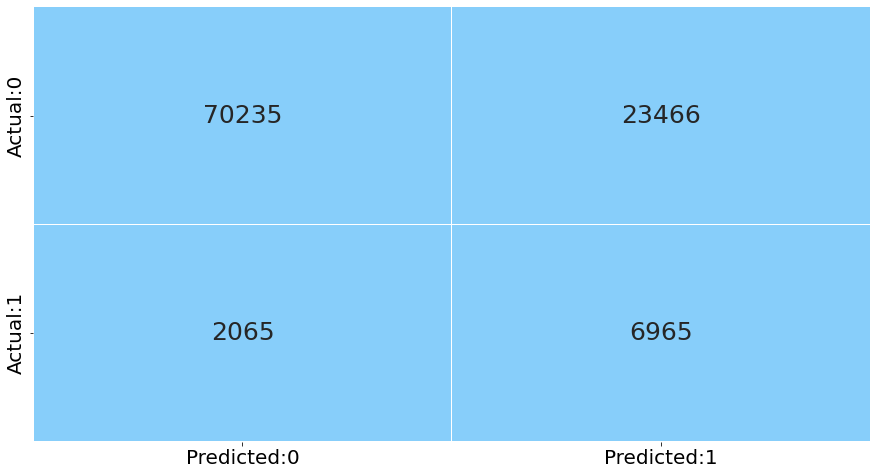

In [17]:
# call the function to plot the confusion matrix

plot_confusion_matrix(lgr)

In [18]:
test_report = get_test_report(lgr) #model predection on test data
print(test_report)

              precision    recall  f1-score   support

           0       0.97      0.75      0.85     93701
           1       0.23      0.77      0.35      9030

    accuracy                           0.75    102731
   macro avg       0.60      0.76      0.60    102731
weighted avg       0.91      0.75      0.80    102731



In [75]:
print( get_train_report(lgr))

              precision    recall  f1-score   support

           0       0.97      0.75      0.85    229405
           1       0.23      0.77      0.35     22107

    accuracy                           0.75    251512
   macro avg       0.60      0.76      0.60    251512
weighted avg       0.91      0.75      0.80    251512



0.8359615685968337


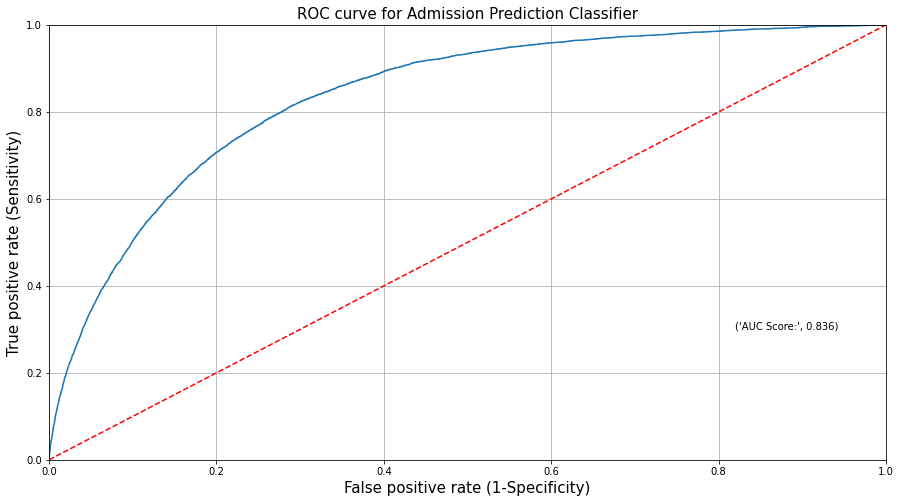

In [78]:
plot_roc(lgr)

In [10]:
# # instantiate the 'AdaBoostClassifier'
# # n_estimators: number of estimators at which boosting is terminated
# # pass the 'random_state' to obtain the same results for each code implementation
ada_model_lgr_wt = AdaBoostClassifier(base_estimator= lgr,n_estimators = 60, random_state = 10)

#fit the model using fit() on train data
ada_model_lgr_wt.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=LogisticRegression(class_weight='balanced'),
                   n_estimators=60, random_state=10)

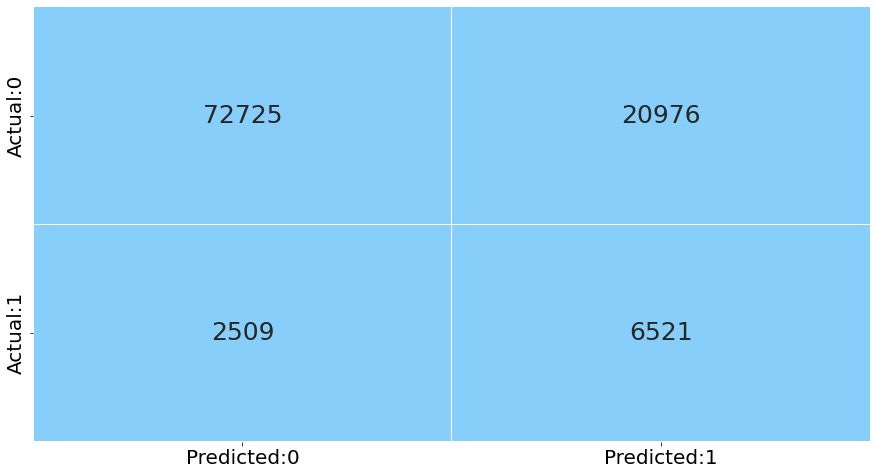

In [11]:
# call the function to plot the confusion matrix

plot_confusion_matrix(ada_model_lgr_wt)

In [13]:
test_report = get_test_report(ada_model_lgr_wt) #model predection on test data
print(test_report)

              precision    recall  f1-score   support

           0       0.97      0.78      0.86     93701
           1       0.24      0.72      0.36      9030

    accuracy                           0.77    102731
   macro avg       0.60      0.75      0.61    102731
weighted avg       0.90      0.77      0.82    102731



In [16]:
print( get_train_report(ada_model_lgr_wt))

              precision    recall  f1-score   support

           0       0.97      0.78      0.86    229405
           1       0.24      0.73      0.36     22107

    accuracy                           0.77    251512
   macro avg       0.60      0.75      0.61    251512
weighted avg       0.90      0.77      0.82    251512



0.8267591768274296


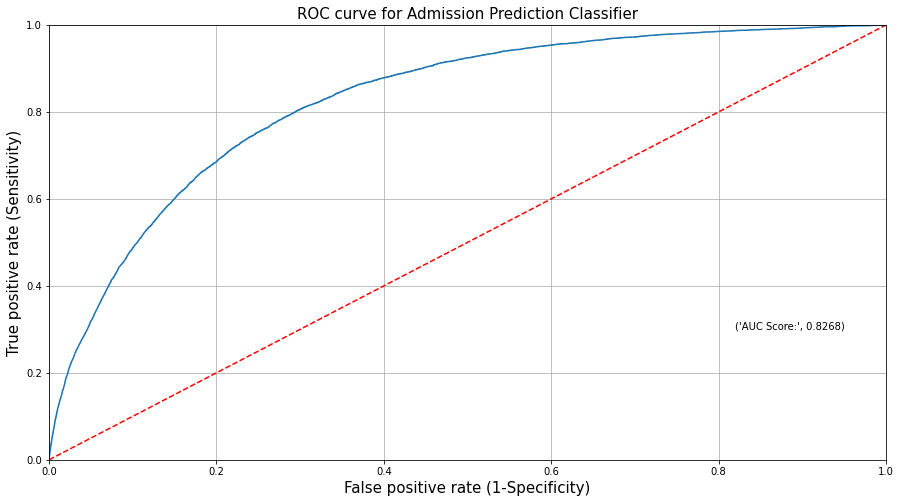

In [83]:
plot_roc(ada_model_lgr_wt)

In [ ]:
#############################feature engineered ###############################

In [85]:
#logestic regression by sciket learn
from sklearn.linear_model import LogisticRegression
lgr_fe = LogisticRegression( class_weight='balanced')
lgr_fe.fit(X_train, y_train)



LogisticRegression(class_weight='balanced')

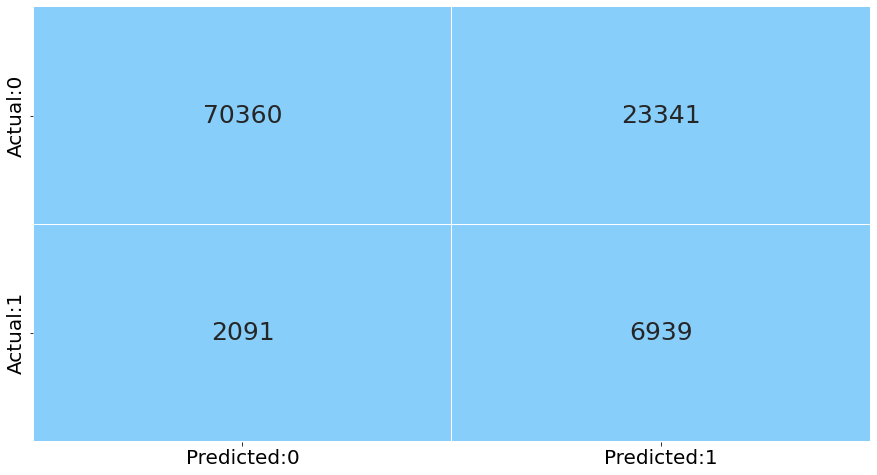

In [30]:
# call the function to plot the confusion matrix

plot_confusion_matrix(lgr_fe)

In [86]:
test_report = get_test_report(lgr_fe) #model predection on test data
print(test_report)

              precision    recall  f1-score   support

           0       0.97      0.75      0.85     93701
           1       0.23      0.77      0.35      9030

    accuracy                           0.75    102731
   macro avg       0.60      0.76      0.60    102731
weighted avg       0.91      0.75      0.80    102731



In [87]:
print( get_train_report(lgr_fe))

              precision    recall  f1-score   support

           0       0.97      0.75      0.85    229405
           1       0.23      0.77      0.35     22107

    accuracy                           0.75    251512
   macro avg       0.60      0.76      0.60    251512
weighted avg       0.91      0.75      0.80    251512



0.8359615685968337


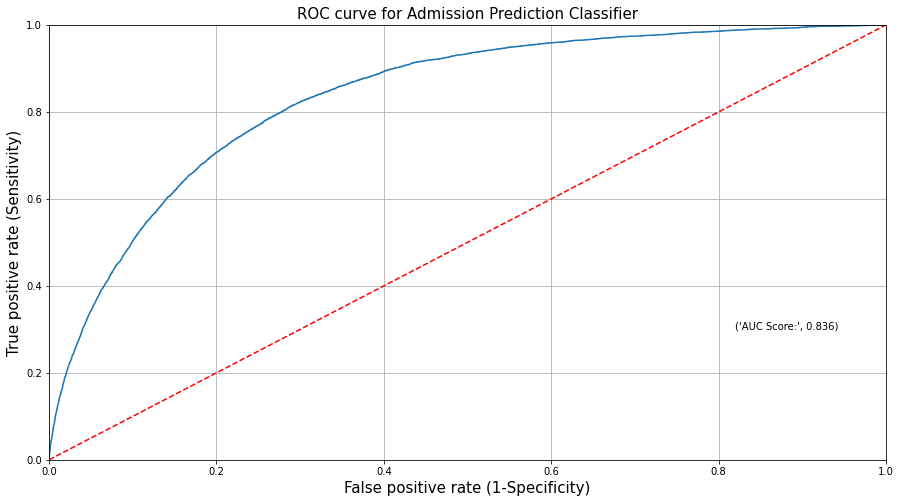

In [88]:
plot_roc(lgr_fe)

In [93]:
# # instantiate the 'AdaBoostClassifier'
# # n_estimators: number of estimators at which boosting is terminated
# # pass the 'random_state' to obtain the same results for each code implementation
ada_model_lgr_wt_fe = AdaBoostClassifier(base_estimator= lgr_fe,n_estimators = 60, random_state = 10)

#fit the model using fit() on train data
ada_model_lgr_wt_fe.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=LogisticRegression(class_weight='balanced'),
                   n_estimators=60, random_state=10)

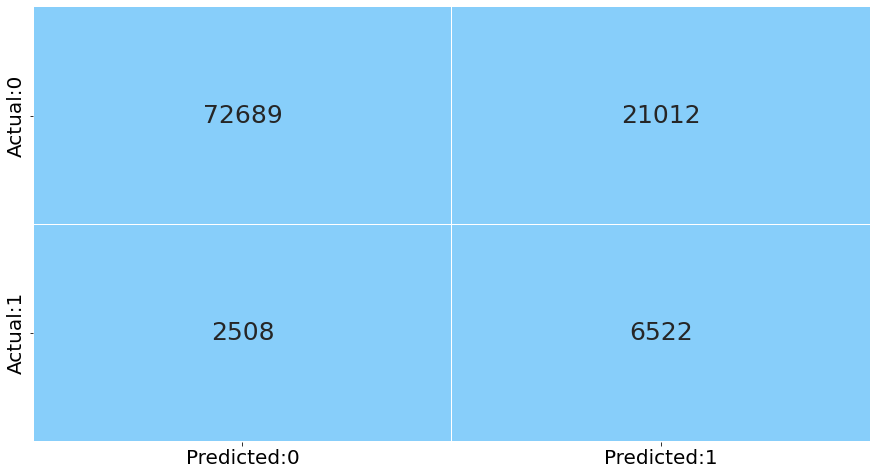

In [94]:
# call the function to plot the confusion matrix

plot_confusion_matrix(ada_model_lgr_wt_fe)

In [95]:
test_report = get_test_report(ada_model_lgr_wt_fe) #model predection on test data
print(test_report)

              precision    recall  f1-score   support

           0       0.97      0.78      0.86     93701
           1       0.24      0.72      0.36      9030

    accuracy                           0.77    102731
   macro avg       0.60      0.75      0.61    102731
weighted avg       0.90      0.77      0.82    102731



In [96]:
print( get_train_report(ada_model_lgr_wt_fe))

              precision    recall  f1-score   support

           0       0.97      0.78      0.86    229405
           1       0.24      0.73      0.36     22107

    accuracy                           0.77    251512
   macro avg       0.60      0.75      0.61    251512
weighted avg       0.90      0.77      0.82    251512



0.8267591768274296


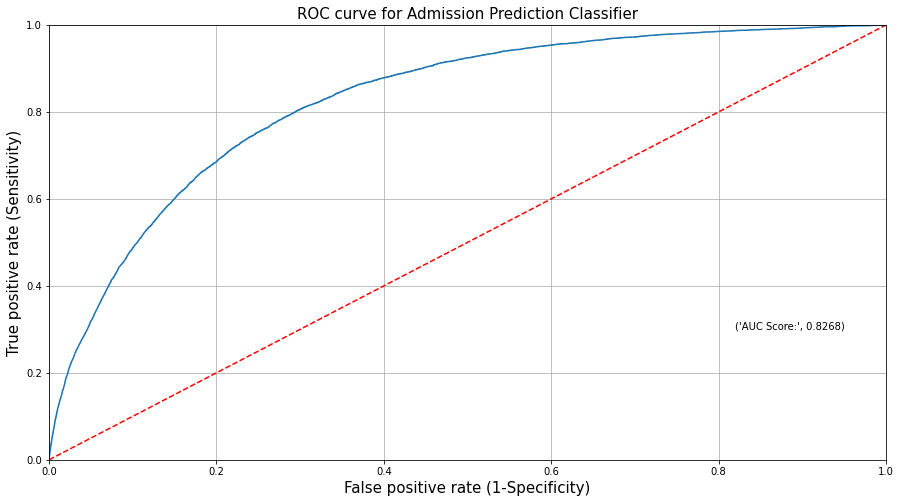

In [97]:
plot_roc(ada_model_lgr_wt_fe)

In [81]:
#this will capture the all score of the data
model_all=[lgr_fe,ada_model_lgr_wt_fe]
model_scores = { "Model Name" : [],
                "Accuracy score train" : [],
               "Precision_score train" : [],
               "Recall_Score train" : [],
               "Roc_AUC_Score train" : [],
                "F1-Score Train" : [],
               "Accuracy score test" : [],
               "Precision_score test" : [],
               "Recall_Score test" : [],
               "Roc_AUC_Score test" : [],
               "F1-Score test" : []}

for model in model_all:
    
    model_scores['Model Name'].append(str(model))
    pred_tr = model.predict(X_train)
    model_scores['Accuracy score train'].append(model.score(X_train,y_train))
     
    model_scores['Precision_score train'].append(precision_score(y_train,pred_tr))
    model_scores['Recall_Score train'].append(recall_score(y_train,pred_tr))
    model_scores['Roc_AUC_Score train'].append(roc_auc_score(y_train,pred_tr))
    model_scores['F1-Score Train'].append(f1_score(y_train,pred_tr))
    
    pred_ts = model.predict(X_test) 
    model_scores['Accuracy score test'].append(model.score(X_test,y_test))
     
    model_scores['Precision_score test'].append(precision_score(y_test,pred_ts))
    model_scores['Recall_Score test'].append(recall_score(y_test,pred_ts))
    model_scores['Roc_AUC_Score test'].append(roc_auc_score(y_test,pred_ts))
    model_scores['F1-Score test'].append(f1_score(y_test,pred_ts))

scores_df=pd.DataFrame(model_scores)